In [1]:
# Import packages and implement notebook settings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(shuffle = True, random_state = 0)


pd.set_option('display.max_rows', 1000); pd.set_option('display.max_columns', 1000); pd.set_option('display.width', 1000)

%matplotlib inline 

sns.set_theme(style="darkgrid")


# Data Import

In [2]:
import os

current_directory = os.getcwd()

dataframes = ['features.csv', 'features_dum_drop.csv', 'features_dum_nodrop.csv', 'features_encoded.csv',
              'response.csv',
              'X_train_drop.csv', 'X_test_drop.csv', 'y_train_drop.csv', 'y_test_drop.csv',
              'X_train_nodrop.csv', 'X_test_nodrop.csv', 'y_train_nodrop.csv', 'y_test_nodrop.csv',
              'X_train_encoded.csv', 'X_test_encoded.csv', 'y_train_encoded.csv', 'y_test_encoded.csv',
              'X_train_drop_scaled.csv', 'X_test_drop_scaled.csv',
              'X_train_nodrop_scaled.csv', 'X_test_nodrop_scaled.csv']

loaded_dataframes = {}

for file_name in dataframes:
    
    df_name = file_name.split('.csv')[0]
    file_path = os.path.join(current_directory, file_name)
    loaded_dataframes[df_name] = pd.read_csv(file_path, sep='\t')



In [3]:
features = loaded_dataframes['features']
features_dum_drop = loaded_dataframes['features_dum_drop']
features_dum_nodrop = loaded_dataframes['features_dum_nodrop']
features_encoded = loaded_dataframes['features_encoded']

response = loaded_dataframes['response']


X_train_drop_scaled = loaded_dataframes['X_train_drop_scaled']
X_test_drop_scaled = loaded_dataframes['X_test_drop_scaled']
y_train_drop_scaled = loaded_dataframes['y_train_drop']['SalePrice']
y_test_drop_scaled = loaded_dataframes['y_test_drop']['SalePrice']

X_train_nodrop_scaled = loaded_dataframes['X_train_nodrop_scaled']
X_test_nodrop_scaled = loaded_dataframes['X_test_nodrop_scaled']
y_train_nodrop_scaled = loaded_dataframes['y_train_nodrop']['SalePrice']
y_test_nodrop_scaled = loaded_dataframes['y_test_nodrop']['SalePrice']

# Penalized Linear Regression

## Lasso - With Drop - Base Model

In [4]:
# from sklearn.linear_model import Lasso

# lasso = Lasso()

# lasso.fit(X = X_train_drop_scaled,y = (y_train_drop_scaled))
# print('Best train score: ' + str(lasso.score(X = X_train_drop_scaled,y = (y_train_drop_scaled))))
# print('Best test score: ' + str(lasso.score(X = X_test_drop_scaled,y = (y_test_drop_scaled))))


In [5]:
from sklearn.linear_model import Lasso

lasso = Lasso(random_state = 0, alpha = 0.005)

lasso.fit(X = X_train_drop_scaled,y = np.log(y_train_drop_scaled))
print('Best train score: ' + str(lasso.score(X = X_train_drop_scaled,y = np.log(y_train_drop_scaled))))
print('Best test score: ' + str(lasso.score(X = X_test_drop_scaled,y = np.log(y_test_drop_scaled))))



Best train score: 0.9300990283113351
Best test score: 0.923980344088662


In [6]:
lasso_drop_scaled_train_test_score = pd.DataFrame({'Model': ['Lasso Penalized Regression_Drop_Scaled'],
              'Train Score': [lasso.score(X = X_train_drop_scaled,y = np.log(y_train_drop_scaled))],
              'Test Score': [lasso.score(X = X_test_drop_scaled,y = np.log(y_test_drop_scaled))]
             })
lasso_drop_scaled_train_test_score

,Model,Train Score,Test Score
0,Lasso Penalized Regression_Drop_Scaled,0.930099,0.92398


In [7]:
# sns.set_theme(style="darkgrid")


# sns.scatterplot(x = lasso.predict(X_train_drop_scaled), y =(y_train_drop_scaled))
# plt.title('Lasso Penalized Linear Regression (Log Train Data): Actual vs. Predicted')
# plt.xlabel('Predicted SalePrice')
# plt.ylabel('Actual SalePrice')

Text(0, 0.5, 'Actual SalePrice')

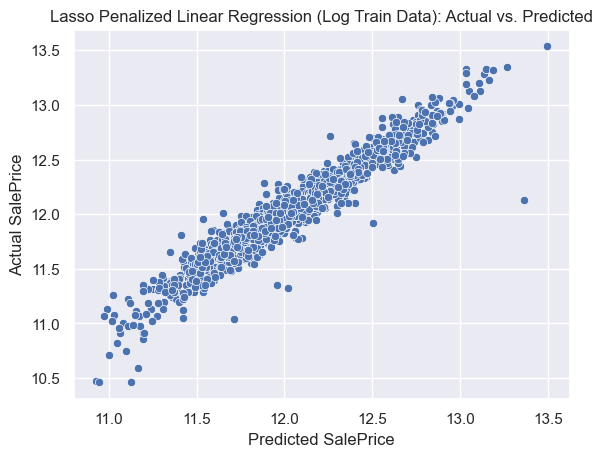

In [8]:
sns.scatterplot(x = lasso.predict(X_train_drop_scaled), y = np.log(y_train_drop_scaled))
plt.title('Lasso Penalized Linear Regression (Log Train Data): Actual vs. Predicted')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')

In [9]:
# sns.scatterplot(x = lasso.predict(X_test_drop_scaled), y = (y_test_drop_scaled))
# plt.title('Lasso Penalized Linear Regression (Log Test Data): Actual vs. Predicted')
# plt.xlabel('Predicted SalePrice')
# plt.ylabel('Actual SalePrice')

Text(0, 0.5, 'Actual SalePrice')

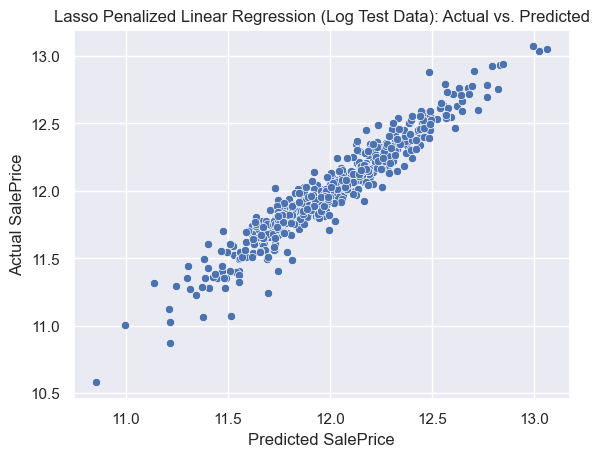

In [10]:
sns.scatterplot(x = lasso.predict(X_test_drop_scaled), y = np.log(y_test_drop_scaled))
plt.title('Lasso Penalized Linear Regression (Log Test Data): Actual vs. Predicted')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')

## Lasso - With Drop - Cross Validation


In [11]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline


# scaler = StandardScaler()

# lasso = Lasso(random_state = 0, )

# pipe = Pipeline([('scaler',scaler),('model',lasso)])

# lasso_drop_scaled_cv = cross_val_score(estimator = pipe, X = features_dum_drop, y = (response), cv = kf, scoring = 'r2')



In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scaler = StandardScaler()

lasso = Lasso(random_state = 0, alpha = 0.005)

pipe = Pipeline([('scaler',scaler),('model',lasso)])

lasso_drop_scaled_cv = cross_val_score(estimator = pipe, X = features_dum_drop, y = np.log(response), cv = kf, scoring = 'r2')



In [13]:
print('Mean cross-validation score: ' + str(lasso_drop_scaled_cv.mean()))
print('Std dev cross-validation score: ' + str(lasso_drop_scaled_cv.std()))

Mean cross-validation score: 0.9157247601849056
Std dev cross-validation score: 0.0176399683191059


## Lasso - With Drop - Hyperparameter Tuning


In [14]:
from sklearn.model_selection import GridSearchCV

lasso = Lasso(random_state = 0)

grid = {'alpha': np.linspace(0.00001, 0.005, 20)}

gsCV = GridSearchCV(lasso, grid, cv = kf, return_train_score=True, n_jobs=-1)
gsCV.fit(X_train_drop_scaled, np.log(y_train_drop_scaled))

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.024e+00, tolerance: 2.574e-02
  model = cd_fast.enet_coordinate_descent(
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.246e+00, tolerance: 2.513e-02
  model = cd_fast.enet_coordinate_descent(
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Lasso(random_state=0), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-05, 2.72631579e-04, 5.35263158e-04, 7.97894737e-04,
       1.06052632e-03, 1.32315789e-03, 1.58578947e-03, 1.84842105e-03,
       2.11105263e-03, 2.37368421e-03, 2.63631579e-03, 2.89894737e-03,
       3.16157895e-03, 3.42421053e-03, 3.68684211e-03, 3.94947368e-03,
       4.21210526e-03, 4.47473684e-03, 4.73736842e-03, 5.00000000e-03])},
             return_train_score=True)

In [15]:
gsCV_lasso_train_vs_test_df = pd.DataFrame(data = {'train_score': gsCV.cv_results_['mean_train_score'],\
                                               'test_score': gsCV.cv_results_['mean_test_score']}).reset_index().rename(columns = {'index': 'model_number'})
gsCV_lasso_train_vs_test_df['model_number'] = gsCV_lasso_train_vs_test_df['model_number'] + 1
gsCV_lasso_train_vs_test_df['score_difference'] = gsCV_lasso_train_vs_test_df['train_score'] - gsCV_lasso_train_vs_test_df['test_score']

gsCV_lasso_train_vs_test_df = gsCV_lasso_train_vs_test_df.melt(id_vars = ['model_number','score_difference'], value_vars = ['train_score', 'test_score'], var_name = 'score_type', value_name = 'score')

gsCV_lasso_train_vs_test_df.head()


,model_number,score_difference,score_type,score
0,1,0.058986,train_score,0.949631
1,2,0.038535,train_score,0.948504
2,3,0.034850,train_score,0.947525
3,4,0.032205,train_score,0.946684
4,5,0.030184,train_score,0.945820


<Axes: xlabel='model_number', ylabel='score'>

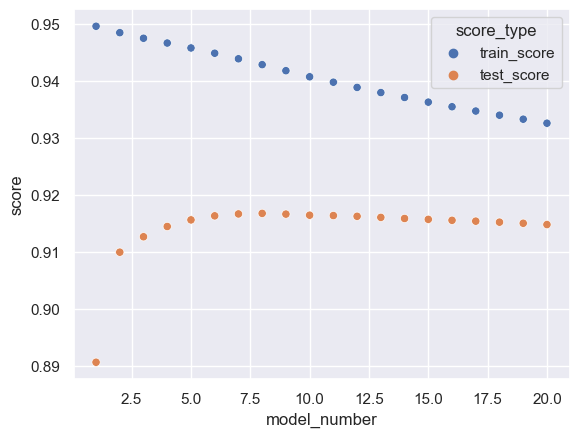

In [16]:
sns.scatterplot(data = gsCV_lasso_train_vs_test_df, y = 'score', x = 'model_number', hue = 'score_type')

In [17]:
# Create DataFrame to store coefficients
coefficients_df = pd.DataFrame(columns=['alpha'] + list(X_train_drop_scaled.columns))
feature_coefficient_list = []
alpha_list = []

for i in range(len(gsCV.cv_results_['params'])):
    alpha = gsCV.cv_results_['params'][i]['alpha']
    alpha_list.append(alpha)
    lasso_model = Lasso(alpha=alpha, random_state=0)  
    lasso_model.fit(X_train_drop_scaled, np.log(y_train_drop_scaled))  
    coef = lasso_model.coef_  
    feature_coefficient_list.append(list(zip(X_train_drop_scaled.columns, coef)))
    row_data = [alpha] + list(coef)
    coefficients_df.loc[i] = row_data

coefficients_df = coefficients_df.melt(id_vars = ['alpha'], value_vars = coefficients_df.drop(columns = 'alpha').columns, var_name = 'feature', value_name = 'coefficient')
coefficients_df.head(10)

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.012e+00, tolerance: 3.124e-02
  model = cd_fast.enet_coordinate_descent(
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.669e-02, tolerance: 3.124e-02
  model = cd_fast.enet_coordinate_descent(
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

,alpha,feature,coefficient
0,0.000010,MSZoning_C (all),-0.027189
1,0.000273,MSZoning_C (all),-0.019995
2,0.000535,MSZoning_C (all),-0.019597
3,0.000798,MSZoning_C (all),-0.019314
4,0.001061,MSZoning_C (all),-0.018940
5,0.001323,MSZoning_C (all),-0.018631
6,0.001586,MSZoning_C (all),-0.018350
7,0.001848,MSZoning_C (all),-0.018090
8,0.002111,MSZoning_C (all),-0.017821
9,0.002374,MSZoning_C (all),-0.017569


In [18]:
lasso_feature_importance = []

for alpha_coef in range(len(feature_coefficient_list)):
    for feat in range(len(feature_coefficient_list[alpha_coef])):
        if feature_coefficient_list[alpha_coef][feat][1] != 0:
            lasso_feature_importance.append([alpha_list[alpha_coef], feature_coefficient_list[alpha_coef][feat][0], feature_coefficient_list[alpha_coef][feat][1]])


In [19]:
signif_feat_list_lasso_drop = []

for feat in lasso_feature_importance:
    if "_" in feat[1]:
        signif_feat_list_lasso_drop.append([feat[0],feat[1].split('_')[0]])
    else:
        signif_feat_list_lasso_drop.append([feat[0],feat[1]])
    
signif_feat_list_lasso_drop

signif_feat_list_lasso_drop_cleaned = []
[signif_feat_list_lasso_drop_cleaned.append(x) for x in signif_feat_list_lasso_drop if x not in signif_feat_list_lasso_drop_cleaned]

cat_signif_feat_list_lasso_drop_cleaned = []
cat_features_col = features.select_dtypes(include=['object']).columns

for feat in signif_feat_list_lasso_drop_cleaned:
    if feat[1] in cat_features_col:
        cat_signif_feat_list_lasso_drop_cleaned.append(feat)
        
cat_signif_feat_list_lasso_drop_cleaned


[[1e-05, 'MSZoning'],
 [1e-05, 'Street'],
 [1e-05, 'Alley'],
 [1e-05, 'LotShape'],
 [1e-05, 'LandContour'],
 [1e-05, 'Utilities'],
 [1e-05, 'LotConfig'],
 [1e-05, 'LandSlope'],
 [1e-05, 'Neighborhood'],
 [1e-05, 'Condition1'],
 [1e-05, 'Condition2'],
 [1e-05, 'BldgType'],
 [1e-05, 'HouseStyle'],
 [1e-05, 'RoofStyle'],
 [1e-05, 'RoofMatl'],
 [1e-05, 'Exterior1st'],
 [1e-05, 'Exterior2nd'],
 [1e-05, 'MasVnrType'],
 [1e-05, 'ExterQual'],
 [1e-05, 'ExterCond'],
 [1e-05, 'Foundation'],
 [1e-05, 'BsmtQual'],
 [1e-05, 'BsmtCond'],
 [1e-05, 'BsmtExposure'],
 [1e-05, 'BsmtFinType1'],
 [1e-05, 'BsmtFinType2'],
 [1e-05, 'Heating'],
 [1e-05, 'HeatingQC'],
 [1e-05, 'CentralAir'],
 [1e-05, 'Electrical'],
 [1e-05, 'KitchenQual'],
 [1e-05, 'Functional'],
 [1e-05, 'FireplaceQu'],
 [1e-05, 'GarageType'],
 [1e-05, 'GarageFinish'],
 [1e-05, 'GarageQual'],
 [1e-05, 'GarageCond'],
 [1e-05, 'PavedDrive'],
 [1e-05, 'PoolQC'],
 [1e-05, 'Fence'],
 [1e-05, 'MiscFeature'],
 [1e-05, 'SaleType'],
 [1e-05, 'SaleCond

In [20]:
coefficients_df.loc[abs(coefficients_df['coefficient']) != 0, :].groupby('alpha')[['feature']].count()

,feature
alpha,
0.000010,271
0.000273,228
0.000535,199
0.000798,180
0.001061,164
0.001323,155
0.001586,143
0.001848,135
0.002111,122


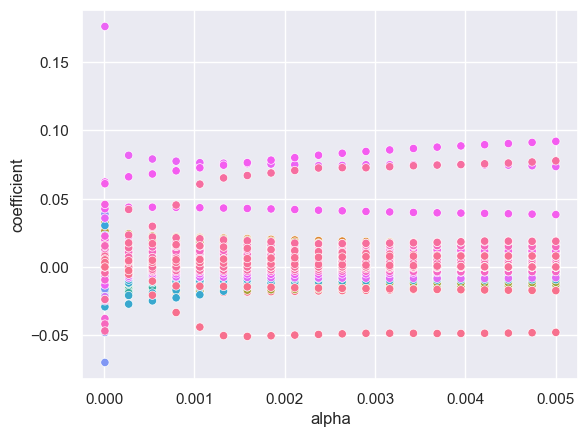

In [21]:
sns.scatterplot(data = coefficients_df, y = 'coefficient', x = 'alpha', hue = 'feature')
plt.legend([],[], frameon=False)


In [22]:
print('Best estimators: ' + str(gsCV.best_estimator_))
print('Best score: ' + str(gsCV.best_score_))

Best estimators: Lasso(alpha=0.001848421052631579, random_state=0)
Best score: 0.9167803183883695


In [23]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score

# Assuming 'X' is your feature matrix and 'y' is your target variable

lasso_cv = LassoCV(alphas=None)

scaler = StandardScaler()

model_pipeline = Pipeline([('scaler', scaler), ('lasso_cv', lasso_cv)])
# Perform cross-validation

cv_models = []

for train_index, test_index in kf.split(features_dum_drop):
    X_train, X_test = features_dum_drop.iloc[train_index,:], features_dum_drop.iloc[test_index,:]
    y_train, y_test = response.iloc[train_index], response.iloc[test_index]
    # Fit the pipeline on the training data
    model_pipeline.fit(X_train, np.log(y_train))
    # Make predictions on the test set
    y_pred = model_pipeline.predict(X_test)
    # Calculate R-squared for the fold
    r2 = r2_score(np.log(y_test), y_pred)
    # Append the fitted model and R-squared to the list
    cv_models.append((model_pipeline.named_steps['lasso_cv'], r2))
# Access the optimal alpha and R-squared for each fold
optimal_alphas = [model[0].alpha_ for model in cv_models]
r2_scores = [model[1] for model in cv_models]
# Print the optimal alphas and R-squared for each fold
for fold, (alpha, r2) in enumerate(zip(optimal_alphas, r2_scores), 1):
    print(f"Fold {fold}: Optimal alpha = {alpha}, R-squared = {r2}")
print()
print(sum(r2_scores)/len(r2_scores))

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:156

Fold 1: Optimal alpha = 0.0011834194142188342, R-squared = 0.929301654499931
Fold 2: Optimal alpha = 0.0011834194142188342, R-squared = 0.8935714512890054
Fold 3: Optimal alpha = 0.0011834194142188342, R-squared = 0.9415809098544106
Fold 4: Optimal alpha = 0.0011834194142188342, R-squared = 0.9228671193222007
Fold 5: Optimal alpha = 0.0011834194142188342, R-squared = 0.9020470558555319

0.9178736381642159


In [24]:
# lasso.set_params(alpha = 151.37339436683138)
# lasso.fit(X = X_train_drop_scaled,y = (y_train_drop_scaled))
# print('Best train score: ' + str(lasso.score(X = X_train_drop_scaled,y = (y_train_drop_scaled))))
# print('Best test score: ' + str(lasso.score(X = X_test_drop_scaled,y = (y_test_drop_scaled))))


In [58]:
lasso.set_params(alpha = 0.0011834194142188342)
lasso.fit(X = X_train_drop_scaled,y = np.log(y_train_drop_scaled))
print('Best train score: ' + str(lasso.score(X = X_train_drop_scaled,y = np.log(y_train_drop_scaled))))
print('Best test score: ' + str(lasso.score(X = X_test_drop_scaled,y = np.log(y_test_drop_scaled))))


Best train score: 0.9425100564164803
Best test score: 0.9294496584253472


/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.482e-02, tolerance: 3.124e-02
  model = cd_fast.enet_coordinate_descent(


In [59]:
lasso_drop_scaled_tuned_train_test_score = pd.DataFrame({'Model': ['Lasso Penalized Regression_Drop_Scaled_Tuned'],
              'Train Score': [lasso.score(X = X_train_drop_scaled,y = np.log(y_train_drop_scaled))],
              'Test Score': [lasso.score(X = X_test_drop_scaled,y = np.log(y_test_drop_scaled))]
             })
lasso_drop_scaled_tuned_train_test_score

,Model,Train Score,Test Score
0,Lasso Penalized Regression_Drop_Scaled_Tuned,0.94251,0.92945


In [60]:
# sns.scatterplot(x = lasso.predict(X_train_drop_scaled), y = (y_train_drop_scaled))
# plt.title('Lasso Penalized Linear Regression (Log Train Data): Actual vs. Predicted')
# plt.xlabel('Predicted SalePrice')
# plt.ylabel('Actual SalePrice')

Text(0, 0.5, 'Actual SalePrice')

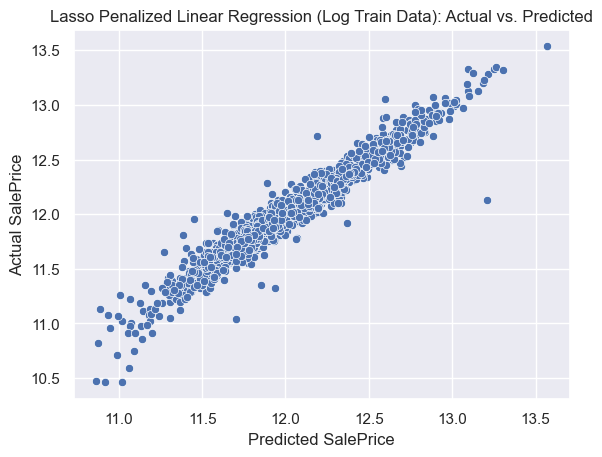

In [61]:
sns.scatterplot(x = lasso.predict(X_train_drop_scaled), y = np.log(y_train_drop_scaled))
plt.title('Lasso Penalized Linear Regression (Log Train Data): Actual vs. Predicted')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')

In [62]:
# sns.scatterplot(x = lasso.predict(X_test_drop_scaled), y = (y_test_drop_scaled))
# plt.title('Lasso Penalized Linear Regression (Log Test Data): Actual vs. Predicted')
# plt.xlabel('Predicted SalePrice')
# plt.ylabel('Actual SalePrice')

Text(0, 0.5, 'Actual SalePrice')

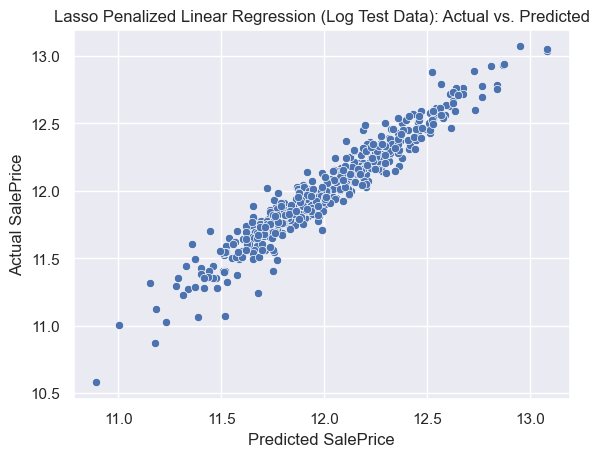

In [30]:
sns.scatterplot(x = lasso.predict(X_test_drop_scaled), y = np.log(y_test_drop_scaled))
plt.title('Lasso Penalized Linear Regression (Log Test Data): Actual vs. Predicted')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')

## Lasso - With Drop - Post Tuning - Cross Validation


In [63]:

lasso = Lasso(alpha = 0.0011834194142188342, random_state = 0)

scaler = StandardScaler()

pipe = Pipeline([('scaler',scaler),('model',lasso)])

lasso_drop_scaled_cv_tuned = cross_val_score(estimator = pipe, X = features_dum_drop, y = np.log(response), cv = kf, scoring = 'r2')



/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.482e-02, tolerance: 3.124e-02
  model = cd_fast.enet_coordinate_descent(


In [64]:
print('Mean cross-validation score: ' + str(lasso_drop_scaled_cv_tuned.mean()))
print('Std dev cross-validation score: ' + str(lasso_drop_scaled_cv_tuned.std()))

Mean cross-validation score: 0.9191250539257414
Std dev cross-validation score: 0.018119140002043305


## Lasso - Without Drop - Base Model

In [33]:
lasso = Lasso(random_state = 0, alpha = 0.005)

lasso.fit(X = X_train_nodrop_scaled,y = np.log(y_train_nodrop_scaled))
print('Best train score: ' + str(lasso.score(X = X_train_nodrop_scaled,y = np.log(y_train_nodrop_scaled))))
print('Best test score: ' + str(lasso.score(X = X_test_nodrop_scaled,y = np.log(y_test_nodrop_scaled))))



Best train score: 0.9330317216999547
Best test score: 0.9269177976270186


In [34]:
lasso_nodrop_scaled_train_test_score = pd.DataFrame({'Model': ['Lasso Penalized Regression_NoDrop_Scaled'],
              'Train Score': [lasso.score(X = X_train_nodrop_scaled,y = np.log(y_train_nodrop_scaled))],
              'Test Score': [lasso.score(X = X_test_nodrop_scaled,y = np.log(y_test_nodrop_scaled))]
             })
lasso_nodrop_scaled_train_test_score

,Model,Train Score,Test Score
0,Lasso Penalized Regression_NoDrop_Scaled,0.933032,0.926918


Text(0, 0.5, 'Actual SalePrice')

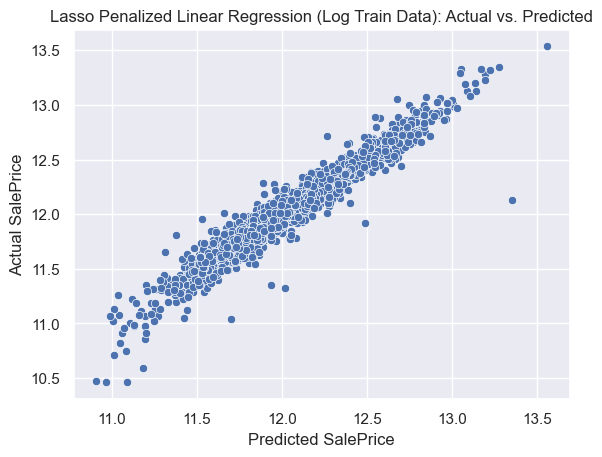

In [35]:
sns.scatterplot(x = lasso.predict(X_train_nodrop_scaled), y = np.log(y_train_nodrop_scaled))
plt.title('Lasso Penalized Linear Regression (Log Train Data): Actual vs. Predicted')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')

Text(0, 0.5, 'Actual SalePrice')

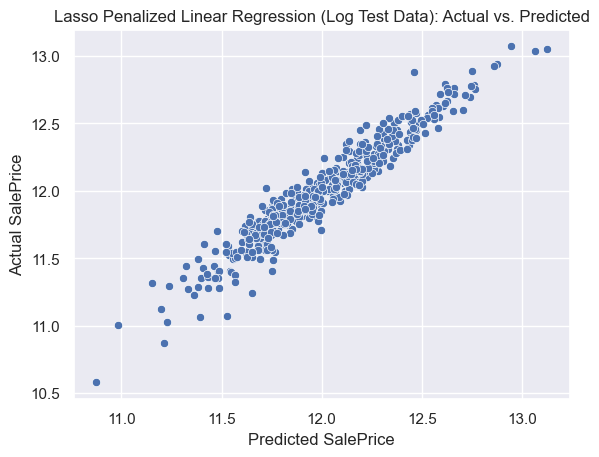

In [36]:
sns.scatterplot(x = lasso.predict(X_test_nodrop_scaled), y = np.log(y_test_nodrop_scaled))
plt.title('Lasso Penalized Linear Regression (Log Test Data): Actual vs. Predicted')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')

## Lasso - Without Drop - Cross Validation


In [37]:

scaler = StandardScaler()

lasso = Lasso(random_state = 0, alpha = 0.005)

pipe = Pipeline([('scaler',scaler),('model',lasso)])

lasso_nodrop_scaled_cv = cross_val_score(estimator = pipe, X = features_dum_nodrop, y = np.log(response), cv = kf, scoring = 'r2')



In [38]:
print('Mean cross-validation score: ' + str(lasso_nodrop_scaled_cv.mean()))
print('Std dev cross-validation score: ' + str(lasso_nodrop_scaled_cv.std()))

Mean cross-validation score: 0.918765706387647
Std dev cross-validation score: 0.016944110906089126


## Lasso - Without Drop - Hyperparamater Tuning


In [39]:
lasso = Lasso(random_state = 0)

grid = {'alpha': np.linspace(0.00001, 0.005, 20)}

gsCV = GridSearchCV(lasso, grid, cv = kf, return_train_score=True, n_jobs=-1)
gsCV.fit(X_train_nodrop_scaled, np.log(y_train_nodrop_scaled))

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.052e-02, tolerance: 2.550e-02
  model = cd_fast.enet_coordinate_descent(
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.883e-02, tolerance: 2.466e-02
  model = cd_fast.enet_coordinate_descent(
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Lasso(random_state=0), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-05, 2.72631579e-04, 5.35263158e-04, 7.97894737e-04,
       1.06052632e-03, 1.32315789e-03, 1.58578947e-03, 1.84842105e-03,
       2.11105263e-03, 2.37368421e-03, 2.63631579e-03, 2.89894737e-03,
       3.16157895e-03, 3.42421053e-03, 3.68684211e-03, 3.94947368e-03,
       4.21210526e-03, 4.47473684e-03, 4.73736842e-03, 5.00000000e-03])},
             return_train_score=True)

In [40]:
gsCV_lasso_train_vs_test_df = pd.DataFrame(data = {'train_score': gsCV.cv_results_['mean_train_score'],\
                                               'test_score': gsCV.cv_results_['mean_test_score']}).reset_index().rename(columns = {'index': 'model_number'})
gsCV_lasso_train_vs_test_df['model_number'] = gsCV_lasso_train_vs_test_df['model_number'] + 1
gsCV_lasso_train_vs_test_df['score_difference'] = gsCV_lasso_train_vs_test_df['train_score'] - gsCV_lasso_train_vs_test_df['test_score']

gsCV_lasso_train_vs_test_df = gsCV_lasso_train_vs_test_df.melt(id_vars = ['model_number','score_difference'], value_vars = ['train_score', 'test_score'], var_name = 'score_type', value_name = 'score')

gsCV_lasso_train_vs_test_df.head()


,model_number,score_difference,score_type,score
0,1,0.056220,train_score,0.949646
1,2,0.040448,train_score,0.949124
2,3,0.036752,train_score,0.948498
3,4,0.034205,train_score,0.947880
4,5,0.032166,train_score,0.947196


<Axes: xlabel='model_number', ylabel='score'>

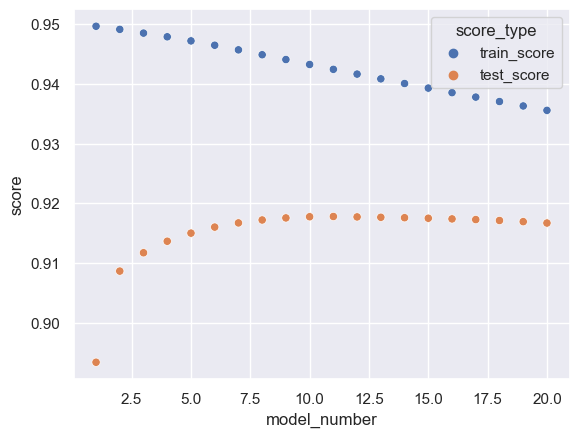

In [41]:
sns.scatterplot(data = gsCV_lasso_train_vs_test_df, y = 'score', x = 'model_number', hue = 'score_type')

In [42]:
# Create DataFrame to store coefficients
coefficients_df = pd.DataFrame(columns=['alpha'] + list(X_train_nodrop_scaled.columns))
feature_coefficient_list = []
alpha_list = []

for i in range(len(gsCV.cv_results_['params'])):
    alpha = gsCV.cv_results_['params'][i]['alpha']
    alpha_list.append(alpha)
    lasso_model = Lasso(alpha=alpha, random_state=0)  
    lasso_model.fit(X_train_nodrop_scaled, np.log(y_train_nodrop_scaled))  
    coef = lasso_model.coef_  
    feature_coefficient_list.append(list(zip(X_train_nodrop_scaled.columns, coef)))
    row_data = [alpha] + list(coef)
    coefficients_df.loc[i] = row_data

coefficients_df = coefficients_df.melt(id_vars = ['alpha'], value_vars = coefficients_df.drop(columns = 'alpha').columns, var_name = 'feature', value_name = 'coefficient')
coefficients_df.head(10)

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.174e+00, tolerance: 3.124e-02
  model = cd_fast.enet_coordinate_descent(
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.430e-02, tolerance: 3.124e-02
  model = cd_fast.enet_coordinate_descent(
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

,alpha,feature,coefficient
0,0.000010,MSZoning_A (agr),0.003772
1,0.000273,MSZoning_A (agr),0.002498
2,0.000535,MSZoning_A (agr),0.000862
3,0.000798,MSZoning_A (agr),0.000000
4,0.001061,MSZoning_A (agr),0.000000
5,0.001323,MSZoning_A (agr),0.000000
6,0.001586,MSZoning_A (agr),0.000000
7,0.001848,MSZoning_A (agr),0.000000
8,0.002111,MSZoning_A (agr),0.000000
9,0.002374,MSZoning_A (agr),0.000000


In [43]:
lasso_feature_importance = []

for alpha_coef in range(len(feature_coefficient_list)):
    for feat in range(len(feature_coefficient_list[alpha_coef])):
        if feature_coefficient_list[alpha_coef][feat][1] != 0:
            lasso_feature_importance.append([alpha_list[alpha_coef], feature_coefficient_list[alpha_coef][feat][0], feature_coefficient_list[alpha_coef][feat][1]])


In [44]:
signif_feat_list_lasso_nodrop = []

for feat in lasso_feature_importance:
    if "_" in feat[1]:
        signif_feat_list_lasso_nodrop.append([feat[0],feat[1].split('_')[0]])
    else:
        signif_feat_list_lasso_nodrop.append([feat[0],feat[1]])
    
signif_feat_list_lasso_nodrop

signif_feat_list_lasso_nodrop_cleaned = []
[signif_feat_list_lasso_nodrop_cleaned.append(x) for x in signif_feat_list_lasso_nodrop if x not in signif_feat_list_lasso_nodrop_cleaned]

cat_signif_feat_list_lasso_nodrop_cleaned = []
cat_features_col = features.select_dtypes(include=['object']).columns

for feat in signif_feat_list_lasso_nodrop_cleaned:
    if feat[1] in cat_features_col:
        cat_signif_feat_list_lasso_nodrop_cleaned.append(feat)
        
cat_signif_feat_list_lasso_nodrop_cleaned


[[1e-05, 'MSZoning'],
 [1e-05, 'Street'],
 [1e-05, 'Alley'],
 [1e-05, 'LotShape'],
 [1e-05, 'LandContour'],
 [1e-05, 'Utilities'],
 [1e-05, 'LotConfig'],
 [1e-05, 'LandSlope'],
 [1e-05, 'Neighborhood'],
 [1e-05, 'Condition1'],
 [1e-05, 'Condition2'],
 [1e-05, 'BldgType'],
 [1e-05, 'HouseStyle'],
 [1e-05, 'RoofStyle'],
 [1e-05, 'RoofMatl'],
 [1e-05, 'Exterior1st'],
 [1e-05, 'Exterior2nd'],
 [1e-05, 'MasVnrType'],
 [1e-05, 'ExterQual'],
 [1e-05, 'ExterCond'],
 [1e-05, 'Foundation'],
 [1e-05, 'BsmtQual'],
 [1e-05, 'BsmtCond'],
 [1e-05, 'BsmtExposure'],
 [1e-05, 'BsmtFinType1'],
 [1e-05, 'BsmtFinType2'],
 [1e-05, 'Heating'],
 [1e-05, 'HeatingQC'],
 [1e-05, 'CentralAir'],
 [1e-05, 'Electrical'],
 [1e-05, 'KitchenQual'],
 [1e-05, 'Functional'],
 [1e-05, 'FireplaceQu'],
 [1e-05, 'GarageType'],
 [1e-05, 'GarageFinish'],
 [1e-05, 'GarageQual'],
 [1e-05, 'GarageCond'],
 [1e-05, 'PavedDrive'],
 [1e-05, 'PoolQC'],
 [1e-05, 'Fence'],
 [1e-05, 'MiscFeature'],
 [1e-05, 'SaleType'],
 [1e-05, 'SaleCond

In [45]:
coefficients_df.loc[abs(coefficients_df['coefficient']) != 0, :].groupby('alpha')[['feature']].count()

,feature
alpha,
0.000010,286
0.000273,241
0.000535,218
0.000798,195
0.001061,187
0.001323,171
0.001586,156
0.001848,150
0.002111,136


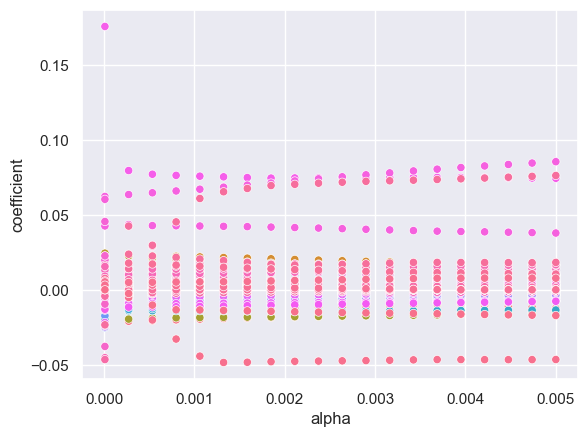

In [46]:
sns.scatterplot(data = coefficients_df, y = 'coefficient', x = 'alpha', hue = 'feature')
plt.legend([],[], frameon=False)


In [47]:
print('Best estimators: ' + str(gsCV.best_estimator_))
print('Best score: ' + str(gsCV.best_score_))

Best estimators: Lasso(alpha=0.0026363157894736845, random_state=0)
Best score: 0.9178142894454758


In [48]:
from sklearn.linear_model import LassoCV
# Assuming 'X' is your feature matrix and 'y' is your target variable

lasso_cv = LassoCV(alphas=np.linspace(0.00001, 0.05, 20))

scaler = StandardScaler()

model_pipeline = Pipeline([('scaler', scaler), ('lasso_cv', lasso_cv)])
# Perform cross-validation

cv_models = []

for train_index, test_index in kf.split(features_dum_nodrop):
    X_train, X_test = features_dum_nodrop.iloc[train_index,:], features_dum_nodrop.iloc[test_index,:]
    y_train, y_test = response.iloc[train_index], response.iloc[test_index]
    # Fit the pipeline on the training data
    model_pipeline.fit(X_train, np.log(y_train))
    # Make predictions on the test set
    y_pred = model_pipeline.predict(X_test)
    # Calculate R-squared for the fold
    r2 = r2_score(np.log(y_test), y_pred)
    # Append the fitted model and R-squared to the list
    cv_models.append((model_pipeline.named_steps['lasso_cv'], r2))
# Access the optimal alpha and R-squared for each fold
optimal_alphas = [model[0].alpha_ for model in cv_models]
r2_scores = [model[1] for model in cv_models]
# Print the optimal alphas and R-squared for each fold
for fold, (alpha, r2) in enumerate(zip(optimal_alphas, r2_scores), 1):
    print(f"Fold {fold}: Optimal alpha = {alpha}, R-squared = {r2}")
print()
print(sum(r2_scores)/len(r2_scores))

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3578506198978744, tolerance: 0.023991194273935514
  model = cd_fast.enet_coordinate_descent_gram(
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.999385339166313, tolerance: 0.023760129017817086
  model = cd_fast.enet_coordinate_descent_gram(
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/

/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4445351715284227, tolerance: 0.02357166027436749
  model = cd_fast.enet_coordinate_descent_gram(
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.980253398219511, tolerance: 0.024932180646254784
  model = cd_fast.enet_coordinate_descent_gram(
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4482348512624945, tolerance: 0.024549777720733836
  model = cd_fast.enet_coordinate_descent_gram(
/Users/bryceferraro/anaconda3/lib/py

Fold 1: Optimal alpha = 0.002641052631578947, R-squared = 0.9306806579644173
Fold 2: Optimal alpha = 0.002641052631578947, R-squared = 0.8959549286229953
Fold 3: Optimal alpha = 0.002641052631578947, R-squared = 0.9427937957273641
Fold 4: Optimal alpha = 0.002641052631578947, R-squared = 0.9263853717847859
Fold 5: Optimal alpha = 0.002641052631578947, R-squared = 0.9057835549152327

0.920319661802959


In [49]:
lasso.set_params(alpha = 0.002641052631578947)
lasso.fit(X = X_train_nodrop_scaled,y = np.log(y_train_nodrop_scaled))
print('Best train score: ' + str(lasso.score(X = X_train_nodrop_scaled,y = np.log(y_train_nodrop_scaled))))
print('Best test score: ' + str(lasso.score(X = X_test_nodrop_scaled,y = np.log(y_test_nodrop_scaled))))


Best train score: 0.9397554258426164
Best test score: 0.9306806579644173


In [50]:
lasso_nodrop_scaled_tuned_train_test_score = pd.DataFrame({'Model': ['Lasso Penalized Regression_NoDrop_Scaled_Tuned'],
              'Train Score': [lasso.score(X = X_train_nodrop_scaled,y = np.log(y_train_nodrop_scaled))],
              'Test Score': [lasso.score(X = X_test_nodrop_scaled,y = np.log(y_test_nodrop_scaled))]
             })
lasso_nodrop_scaled_tuned_train_test_score

,Model,Train Score,Test Score
0,Lasso Penalized Regression_NoDrop_Scaled_Tuned,0.939755,0.930681


Text(0, 0.5, 'Actual SalePrice')

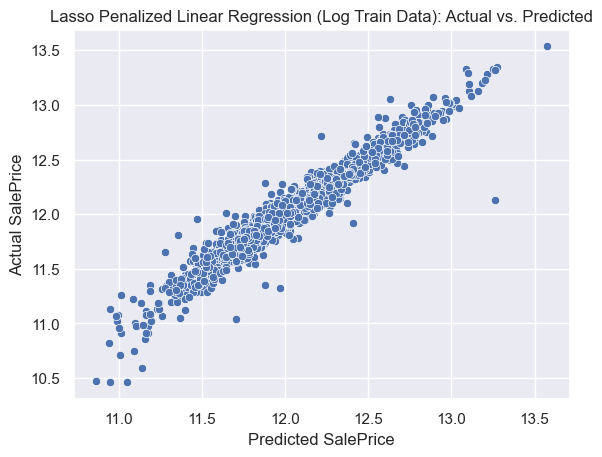

In [51]:
sns.scatterplot(x = lasso.predict(X_train_nodrop_scaled), y = np.log(y_train_nodrop_scaled))
plt.title('Lasso Penalized Linear Regression (Log Train Data): Actual vs. Predicted')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')

Text(0, 0.5, 'Actual SalePrice')

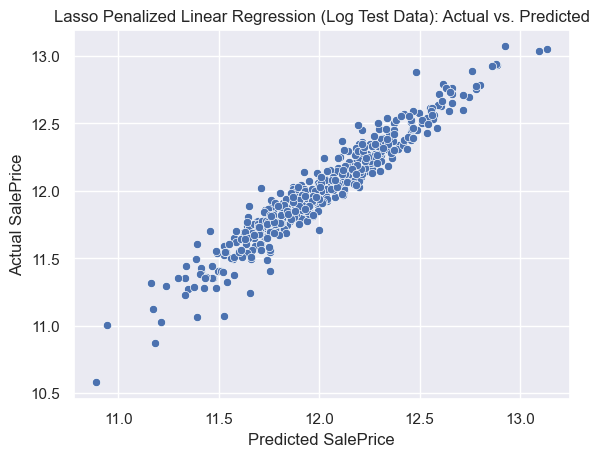

In [52]:
sns.scatterplot(x = lasso.predict(X_test_nodrop_scaled), y = np.log(y_test_nodrop_scaled))
plt.title('Lasso Penalized Linear Regression (Log Test Data): Actual vs. Predicted')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')

## Lasso - Without Drop - Post Tuning - Cross Validation


In [53]:

lasso = Lasso(alpha = 0.002641052631578947, random_state = 0)

scaler = StandardScaler()

pipe = Pipeline([('scaler',scaler),('model',lasso)])

lasso_nodrop_scaled_cv_tuned = cross_val_score(estimator = pipe, X = features_dum_nodrop, y = np.log(response), cv = kf, scoring = 'r2')



In [54]:
print('Mean cross-validation score: ' + str(lasso_nodrop_scaled_cv_tuned.mean()))
print('Std dev cross-validation score: ' + str(lasso_nodrop_scaled_cv_tuned.std()))

Mean cross-validation score: 0.9209885884706365
Std dev cross-validation score: 0.017341815420899465


# Model Results Export

In [65]:
lasso_results = pd.DataFrame(data = {'Model Number': np.linspace(1,5,5),
                                      'Lasso Penalized Regression_Drop_Scaled': lasso_drop_scaled_cv,
                                      'Lasso Penalized Regression_Drop_Scaled_Tuned': lasso_drop_scaled_cv_tuned,
                                      'Lasso Penalized Regression_NoDrop_Scaled': lasso_nodrop_scaled_cv,
                                      'Lasso Penalized Regression_NoDrop_Scaled_Tuned': lasso_nodrop_scaled_cv_tuned  
                                     }
                             )

lasso_results

,Model Number,Lasso Penalized Regression_Drop_Scaled,Lasso Penalized Regression_Drop_Scaled_Tuned,Lasso Penalized Regression_NoDrop_Scaled,Lasso Penalized Regression_NoDrop_Scaled_Tuned
0,1.0,0.923980,0.929450,0.926918,0.930681
1,2.0,0.890949,0.893589,0.894512,0.895955
2,3.0,0.940304,0.941179,0.941307,0.942794
3,4.0,0.922586,0.929361,0.926770,0.929730
4,5.0,0.900804,0.902047,0.904322,0.905784


In [66]:
lasso_train_test_score = pd.concat([lasso_drop_scaled_train_test_score,
           lasso_drop_scaled_tuned_train_test_score,
           lasso_nodrop_scaled_train_test_score,
           lasso_nodrop_scaled_tuned_train_test_score
          ])
lasso_train_test_score

,Model,Train Score,Test Score
0,Lasso Penalized Regression_Drop_Scaled,0.930099,0.923980
0,Lasso Penalized Regression_Drop_Scaled_Tuned,0.942510,0.929450
0,Lasso Penalized Regression_NoDrop_Scaled,0.933032,0.926918
0,Lasso Penalized Regression_NoDrop_Scaled_Tuned,0.939755,0.930681


In [67]:

current_directory = os.getcwd()

dataframes = {'lasso_results': lasso_results,
             'lasso_train_test_score': lasso_train_test_score
             }


for name, df in dataframes.items():

    file_path = os.path.join(current_directory, f"{name}.csv")
    
    df.to_csv(file_path, sep='\t', index=False)